In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import random

In [6]:
data = pd.read_csv('winequality-white.csv', sep=';', decimal='.', na_values='NaN')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
#  разделяю на обучающую и тестовую выборку
df, df_test = train_test_split(data, test_size=0.33) 

In [10]:
df = df.reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.6,0.30,0.40,2.2,0.054,29.0,175.0,0.99445,3.19,0.53,9.8,5
1,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0,5
2,7.1,0.32,0.40,1.5,0.034,13.0,84.0,0.99440,3.42,0.60,10.4,5
3,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.6,7
4,6.8,0.26,0.22,7.7,0.047,57.0,210.0,0.99590,3.10,0.47,9.0,5


In [11]:
df.quality.value_counts()

6    1489
5     972
7     582
4     118
8     108
3       8
9       4
Name: quality, dtype: int64

Как видим, представтелей 3ей и 9ой групп очень мало и клонировать их нет смысла, поэтому лучше их объединить с соседями или удалить

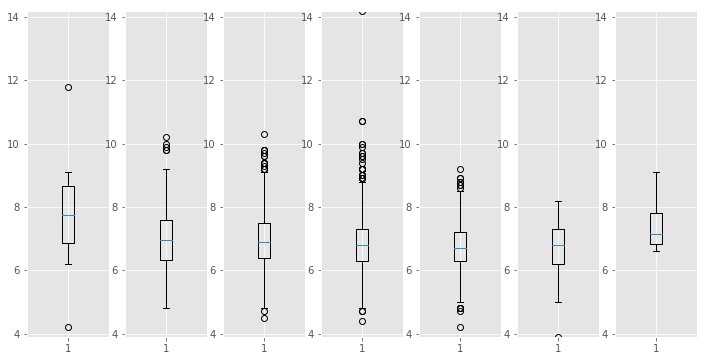

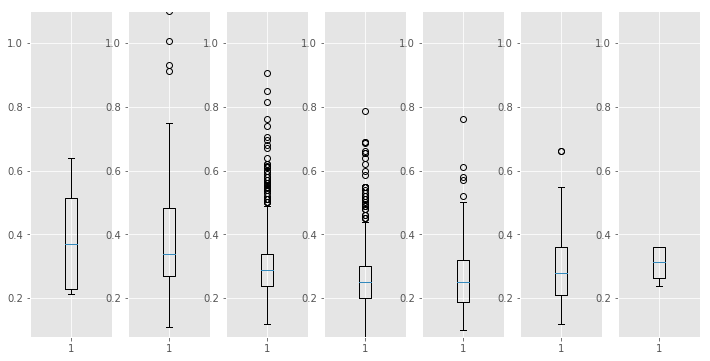

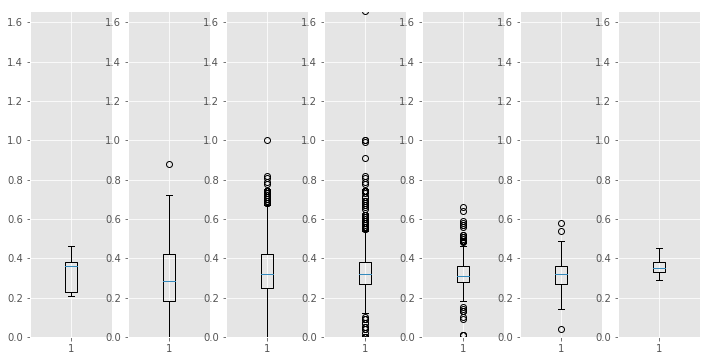

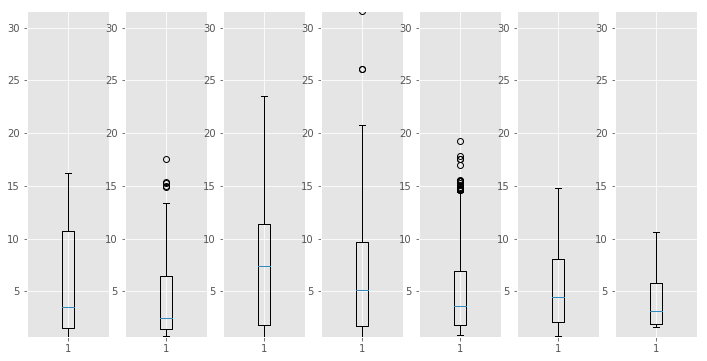

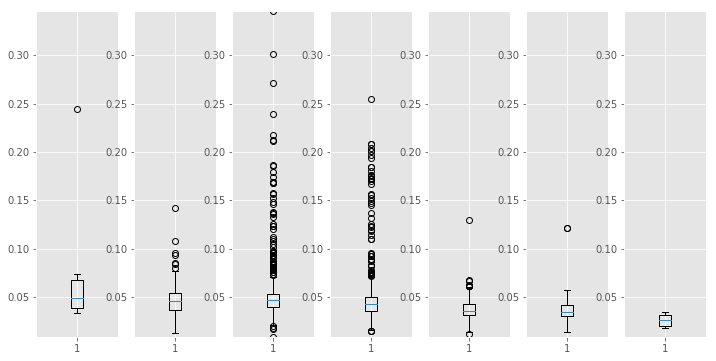

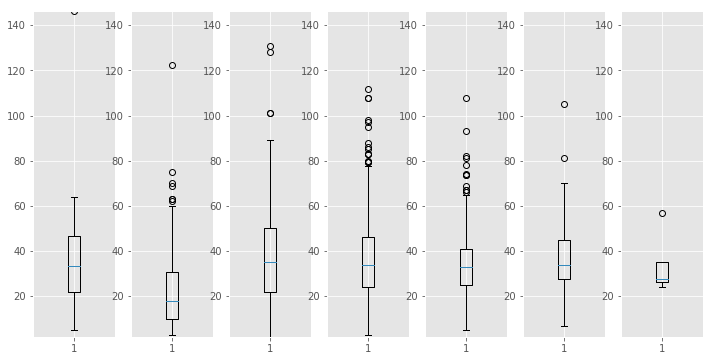

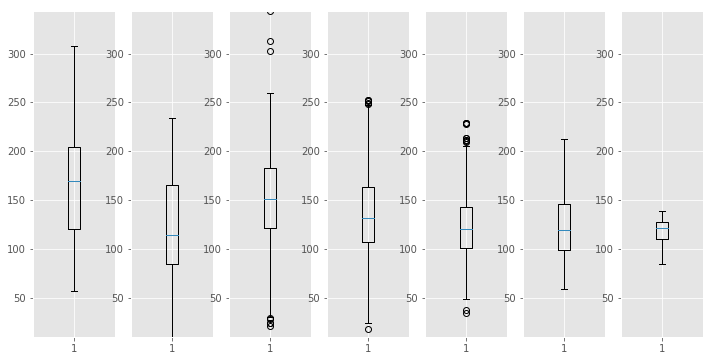

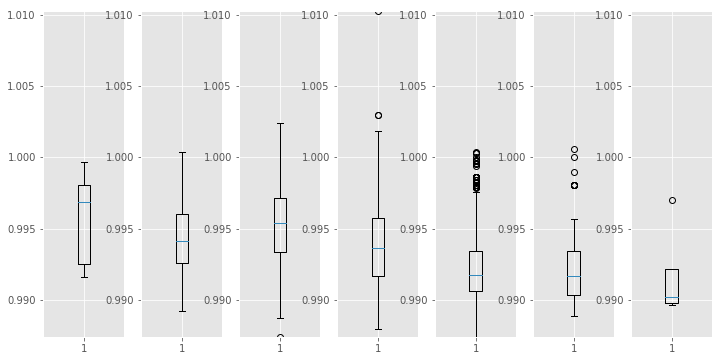

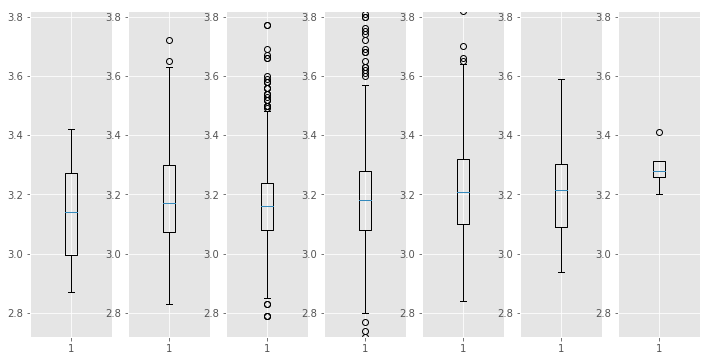

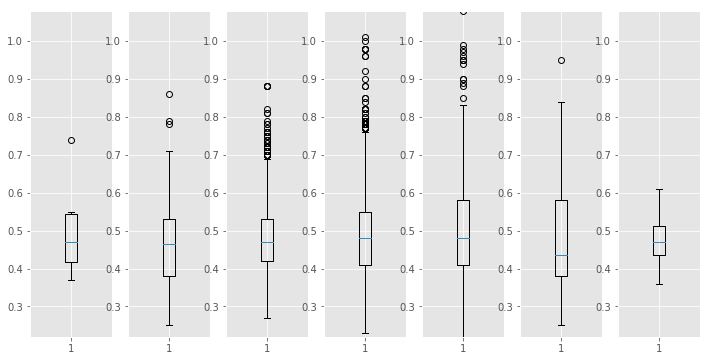

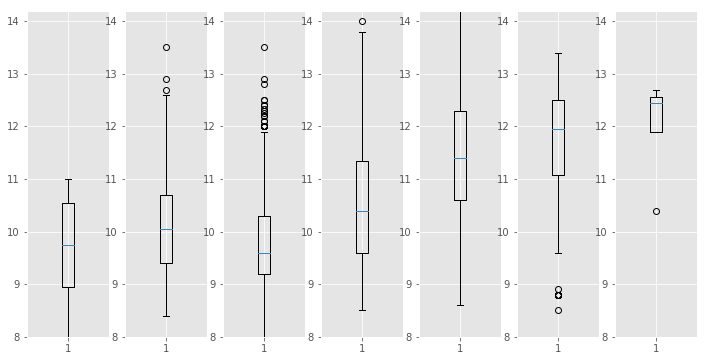

In [12]:
for i in df.keys()[:-1]:
    plt.figure(figsize=(12, 6))
    for j in range(3, 10):
        plt.subplot(1, 7, j-2)
        plt.boxplot((df[i][df.quality == j]).reset_index(drop=True))
        plt.ylim(min(df[i]), max(df[i]))
plt.show()


Третья группа похожа на четвертую, а девятая ни на кого не похожа, так что удалим ее

In [13]:
for i in range(len(df.quality)):
    if df.quality[i] == 3:
        df.quality[i] = 4
df = df.drop(df[df.quality == 9].index)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df.quality.value_counts()

6    1489
5     972
7     582
4     126
8     108
Name: quality, dtype: int64

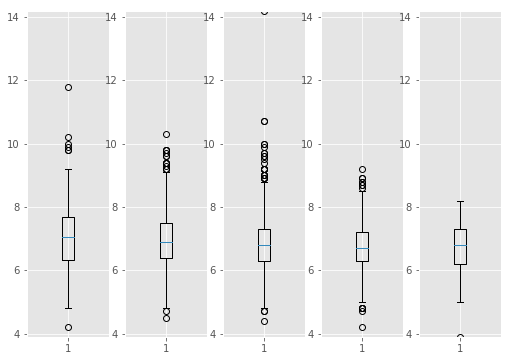

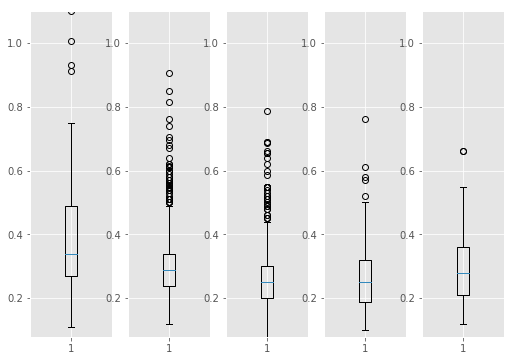

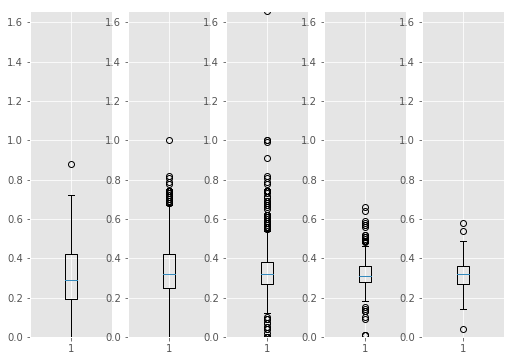

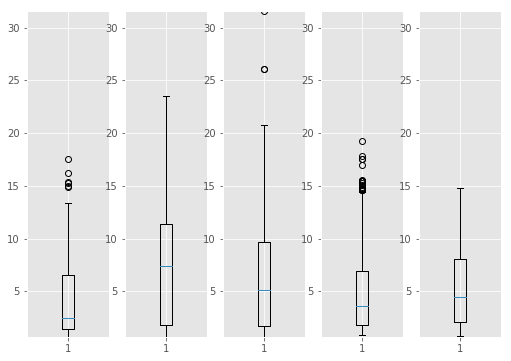

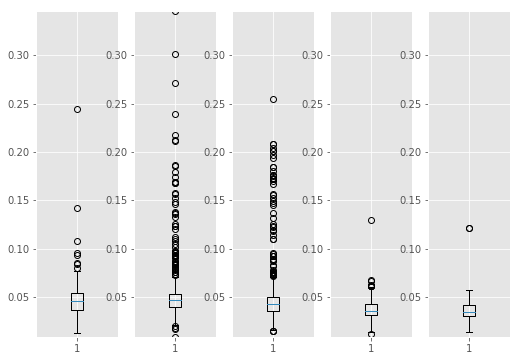

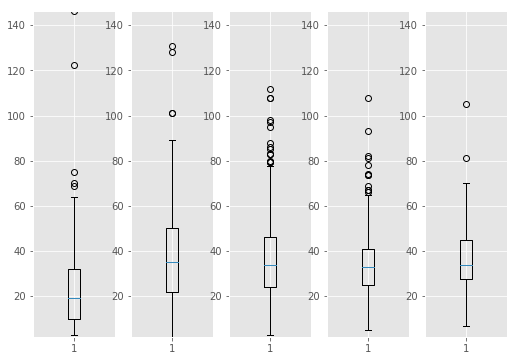

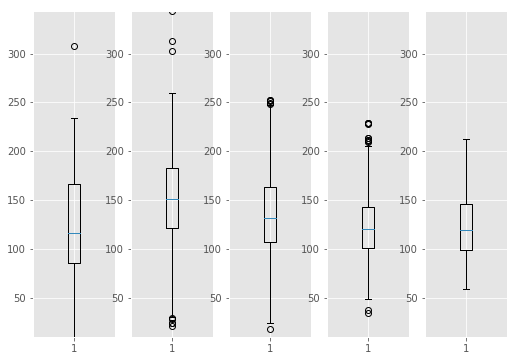

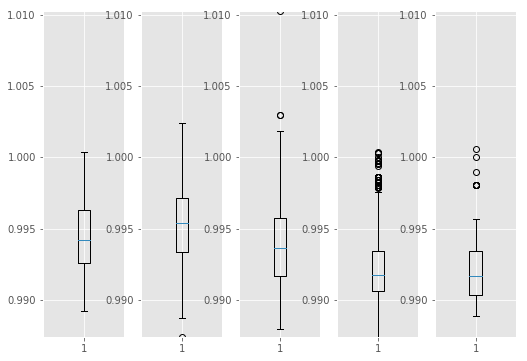

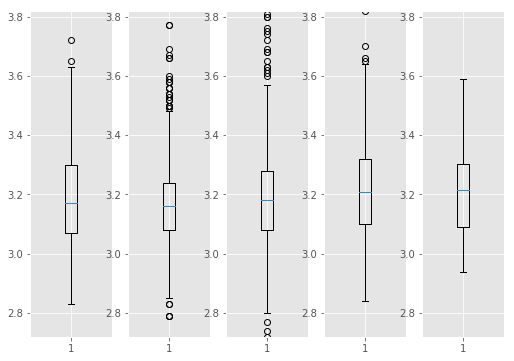

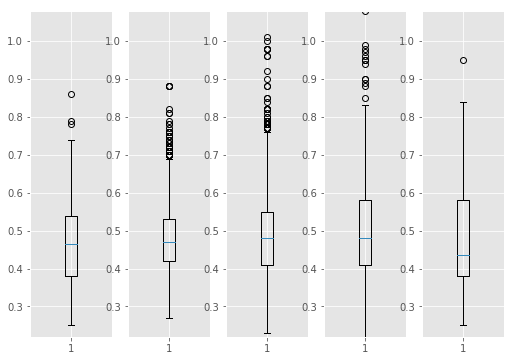

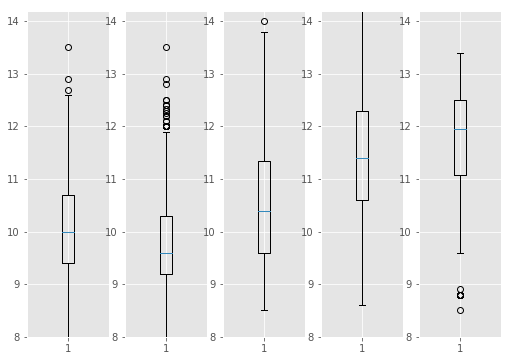

In [15]:
for i in df.keys()[:-1]:
    plt.figure(figsize=(12, 6))
    for j in range(4, 9):
        plt.subplot(1, 7, j-2)
        plt.boxplot((df[i][df.quality == j]).reset_index(drop=True))
        plt.ylim(min(df[i]), max(df[i]))
plt.show()

Видим очень много выбросов сверху, давайте удалим несколько максимумов при каждом признаке, мы не сильно потеряем в данных

In [16]:
for i in df.keys()[:-1]:
    df = df.drop(df[df[i]==max(df[i])].index)
    df = df.drop(df[df[i]==max(df[i])].index)
    df = df.drop(df[df[i]==max(df[i])].index)
    df = df.drop(df[df[i]==max(df[i])].index)

In [17]:
#Проверим, что все группы остались достаточно большими
df.quality.value_counts()

6    1468
5     955
7     573
4     119
8     108
Name: quality, dtype: int64

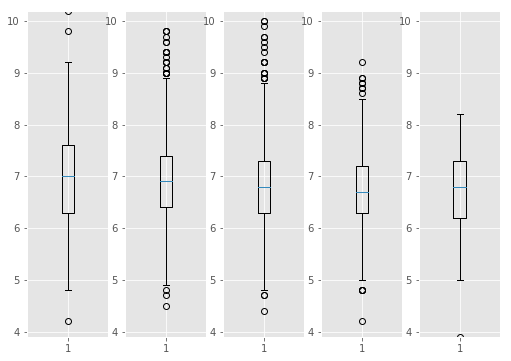

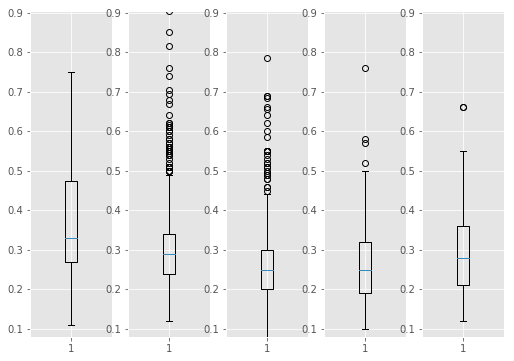

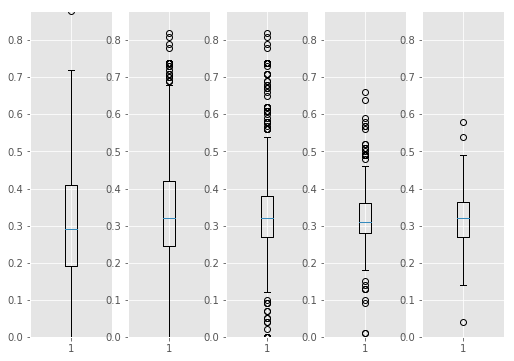

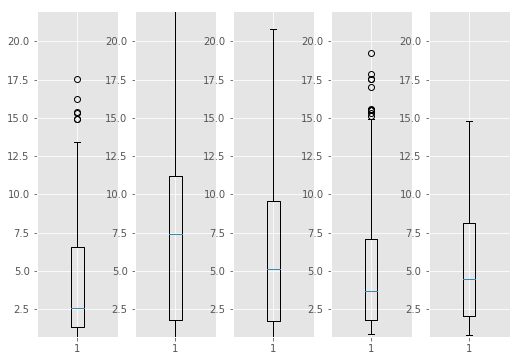

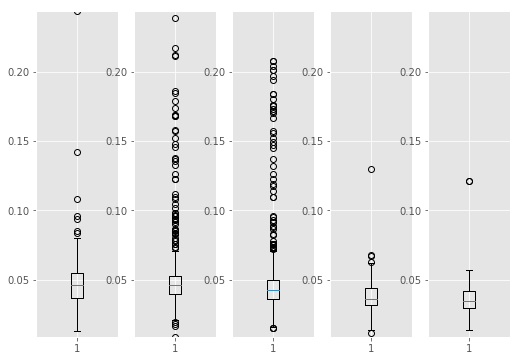

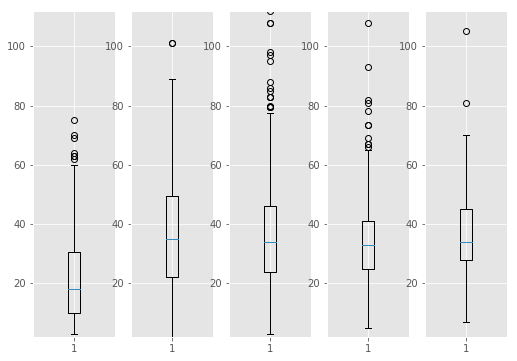

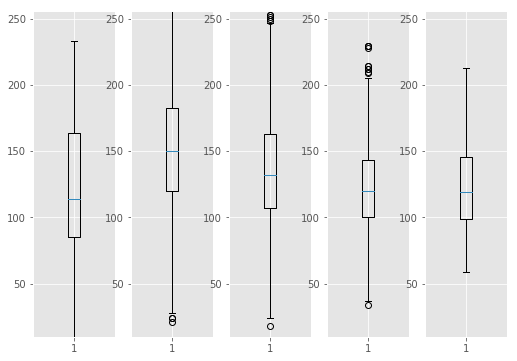

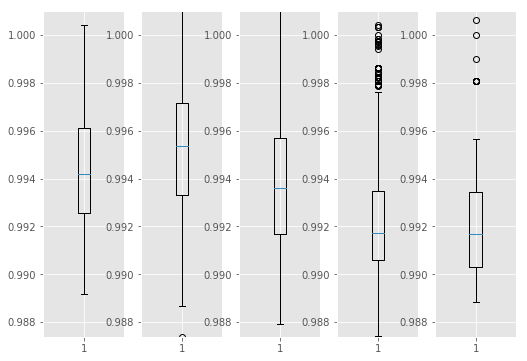

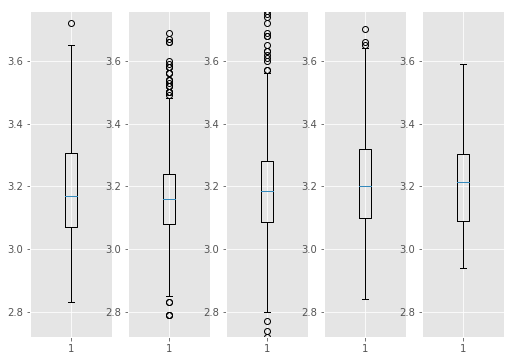

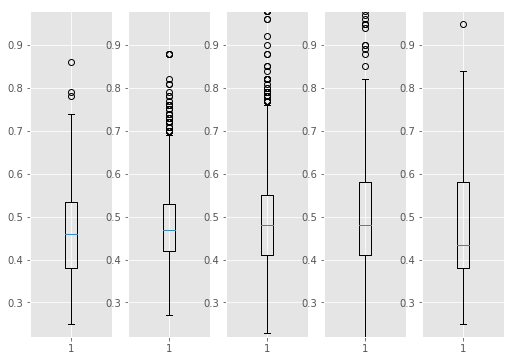

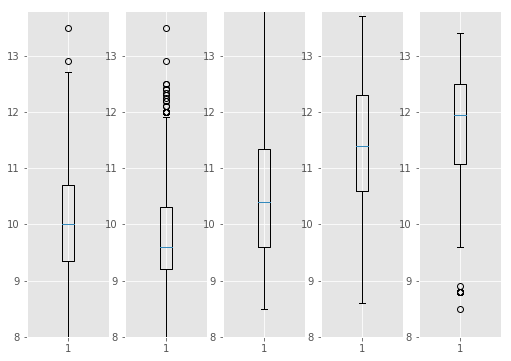

In [18]:
for i in df.keys()[:-1]:
    plt.figure(figsize=(12, 6))
    for j in range(4, 9):
        plt.subplot(1, 7, j-2) 
        plt.boxplot((df[i][df.quality == j]).reset_index(drop=True))
        plt.ylim(min(df[i]), max(df[i]))
plt.show()

Видно, что некоторые признаки не очень значимы, но лучше выбирем незначимые признаки построив дерево решений

In [19]:
X = data.iloc[:, :-1].values  
y = data.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight=None, presort=False)
model.fit(X_train, y_train)
pd.DataFrame({'feature': data.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.475741
1,volatile acidity,0.230879
5,free sulfur dioxide,0.105585
8,pH,0.047239
4,chlorides,0.046511
3,residual sugar,0.025022
9,sulphates,0.024584
2,citric acid,0.017468
7,density,0.015610
0,fixed acidity,0.011362


In [20]:
X = df.iloc[:, :-1].values  
y = df.quality  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight=None, presort=False)
model.fit(X_train, y_train)
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.386604
1,volatile acidity,0.262033
3,residual sugar,0.080259
8,pH,0.063651
4,chlorides,0.057164
0,fixed acidity,0.051950
9,sulphates,0.036045
7,density,0.029145
5,free sulfur dioxide,0.020659
2,citric acid,0.012491


Я считаю можно оставить первые пять

In [21]:
df1 = df[['alcohol', 'volatile acidity', 'free sulfur dioxide', 'quality']]
df_test1 = df_test[['alcohol', 'volatile acidity', 'free sulfur dioxide', 'quality']]
df1.head()

,alcohol,volatile acidity,free sulfur dioxide,quality
0,9.8,0.30,29.0,5
1,9.0,0.29,58.0,5
2,10.4,0.32,13.0,5
3,11.6,0.38,34.0,7
4,9.0,0.26,57.0,5


In [22]:
#  разделяю предикоторы и отклики
X_train = df.iloc[:, :-1].values  
y_train = df.quality
X_test = df_test.iloc[:, :-1].values  
y_test = df_test.quality

In [23]:
#  Стандартизация предикторов

scaler = StandardScaler()  
scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

In [24]:
#  Построение классификатора
#  По умолчанию Евклидово расстояние
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  
classifier.fit(X_train_2, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [25]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)

In [26]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test))

[[ 119    0    0    0    0]
 [   0  955    0    0    0]
 [   0    0 1468    0    0]
 [   0    0    0  573    0]
 [   0    0    0    0  108]]
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       119
           5       1.00      1.00      1.00       955
           6       1.00      1.00      1.00      1468
           7       1.00      1.00      1.00       573
           8       1.00      1.00      1.00       108

   micro avg       1.00      1.00      1.00      3223
   macro avg       1.00      1.00      1.00      3223
weighted avg       1.00      1.00      1.00      3223

[[  0   0   5   4   2   1   0]
 [  0   9  20  13   2   1   0]
 [  0   8 300 153  22   2   0]
 [  0   5 114 497  85   8   0]
 [  0   0  19 100 175   4   0]
 [  0   0   1  17  24  25   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.41      0.20      0.27

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Видим, что мы не разу не ошиблись на тесте, это немного подозрительно

In [27]:
classifier.score(X_test_2, y_test)

0.6221397649969078

In [28]:
accuracy = []
for i in range(1, 80):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    accuracy.append(accuracy_score(y_test, pred_i))
print(np.round(accuracy, 2))

[0.61 0.61 0.62 0.63 0.62 0.63 0.63 0.64 0.65 0.64 0.65 0.65 0.66 0.66
 0.66 0.66 0.65 0.65 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.67 0.66
 0.67 0.67 0.66 0.67 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66
 0.67 0.66 0.66 0.66 0.66 0.66 0.65 0.66 0.66 0.66 0.66 0.66 0.66 0.66
 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66
 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66 0.66]


Text(0, 0.5, 'Accuracy')

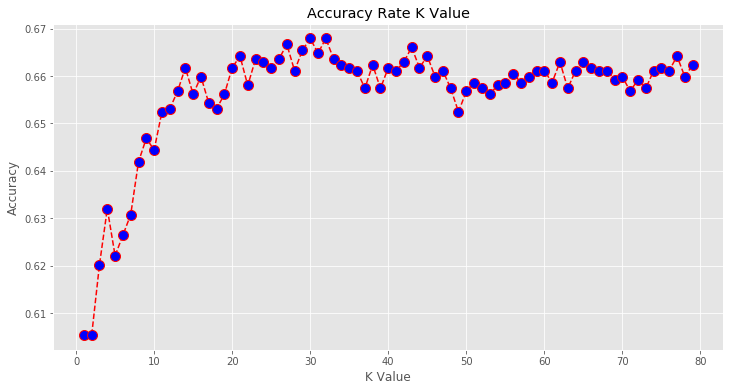

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 80), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

Я думаю можно спокойно брать k меньше 20, например около 15ти, если мы не хотим, чтобы модель быстрее работала.
Если хотим поточнее, то можно выбрать k около 30

In [32]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    error.append(np.mean(pred_i != y_test))
print(np.round(error, 2))

[ 0.39  0.39  0.37  0.37  0.35  0.35  0.35  0.34  0.34  0.34  0.33  0.33
  0.33  0.33  0.32  0.32  0.32  0.32  0.32  0.32  0.32  0.32  0.32  0.32
  0.31  0.32  0.32  0.32  0.31  0.32  0.31  0.31  0.32  0.32  0.32  0.32
  0.32  0.32  0.32]


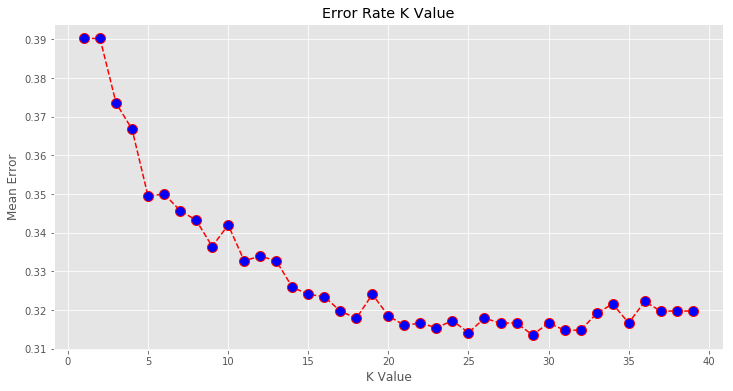

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [34]:
#  разделяю предикоторы и отклики
X_train = df1.iloc[:, :-1].values  
y_train = df1.quality
X_test = df_test1.iloc[:, :-1].values  
y_test = df_test1.quality

In [35]:
#  Стандартизация предикторов

scaler = StandardScaler()  
scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

In [36]:
#  Построение классификатора
#  По умолчанию Евклидово расстояние
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  
classifier.fit(X_train_2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [37]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)

In [38]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test))

[[ 120    1    0    0    0]
 [   1  954    4    1    0]
 [   0   21 1417    1    0]
 [   0    3   12  563    0]
 [   0    0    3    0  128]]
             precision    recall  f1-score   support

          4       0.99      0.99      0.99       121
          5       0.97      0.99      0.98       960
          6       0.99      0.98      0.99      1439
          7       1.00      0.97      0.99       578
          8       1.00      0.98      0.99       131

avg / total       0.99      0.99      0.99      3229

[[  0   0   1   5   0   0   0]
 [  0   7  27  13   0   0   0]
 [  0  11 320 142  10   0   0]
 [  0   7 123 514  84  13   0]
 [  0   1  15 113 152  14   0]
 [  0   0   0  17   7  20   0]
 [  0   0   0   0   1   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.27      0.15      0.19        47
          5       0.66      0.66      0.66       483
          6       0.64      0.69      0.67       741
 

уже больше похоже на то, что мы не переобучились

In [39]:
classifier.score(X_test_2, y_test)

0.62646876932591222

Не сильно проиграли в качестве

In [40]:
accuracy = []
for i in range(1, 80):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    accuracy.append(accuracy_score(y_test, pred_i))
print(np.round(accuracy, 2))

[ 0.59  0.59  0.61  0.63  0.63  0.63  0.64  0.64  0.64  0.64  0.65  0.65
  0.65  0.65  0.64  0.64  0.65  0.64  0.65  0.65  0.65  0.66  0.65  0.65
  0.65  0.65  0.65  0.65  0.65  0.66  0.66  0.66  0.66  0.66  0.66  0.66
  0.67  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66
  0.66  0.67  0.66  0.66  0.67  0.66  0.66  0.66  0.66  0.66  0.66  0.66
  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66
  0.66  0.66  0.66  0.66  0.66  0.67  0.67]


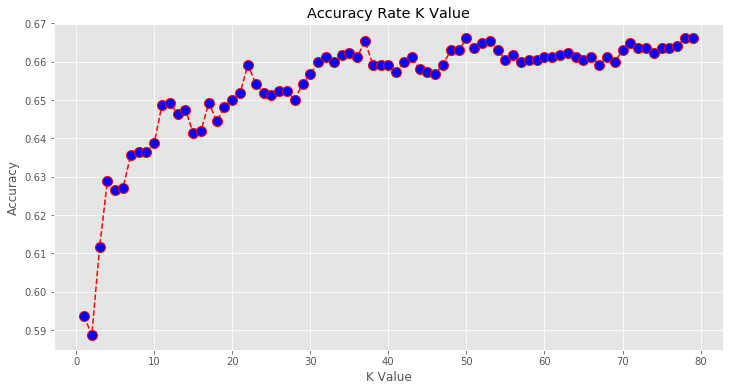

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 80), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

Получили примерно такую же картину.

In [43]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    error.append(np.mean(pred_i != y_test))
print(np.round(error, 2))

[ 0.41  0.41  0.39  0.37  0.37  0.37  0.36  0.36  0.36  0.36  0.35  0.35
  0.35  0.35  0.36  0.36  0.35  0.36  0.35  0.35  0.35  0.34  0.35  0.35
  0.35  0.35  0.35  0.35  0.35  0.34  0.34  0.34  0.34  0.34  0.34  0.34
  0.33  0.34  0.34]


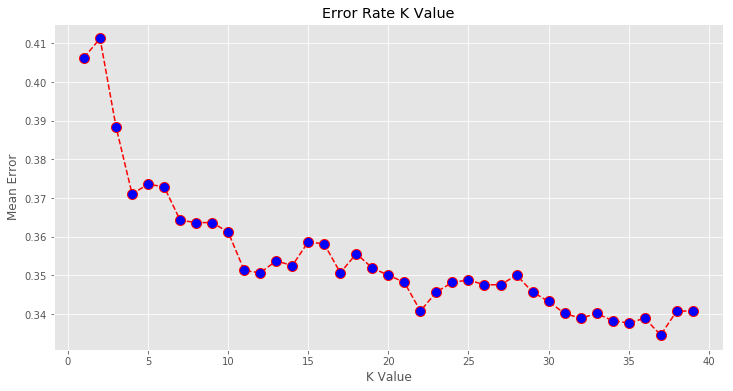

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

#ДАЛЬШЕ МОЖНО НЕ СМОТРЕТЬ

In [46]:
df = data

In [49]:
#Разделим на обучающую и тестовую выборку
df_train, df_test = train_test_split(df, test_size=0.33) 

In [50]:
df_train.quality.value_counts()

6    1464
5     977
7     593
8     120
4     111
3      14
9       2
Name: quality, dtype: int64

In [51]:
df_test.quality.value_counts()

6    734
5    480
7    287
8     55
4     52
3      6
9      3
Name: quality, dtype: int64

расплодим до общего количества

In [52]:
for i in range(3, 10):
    index_i = [random.randint(0, len(df_train[df_train.quality==i])-1) for j in range(max(df_train.quality.value_counts())-len(df_train[df_train.quality==i]))]
    df_train = df_train.append(df_train[df_train.quality==i].iloc[index_i], ignore_index=True)

In [53]:
df_train.quality.value_counts()

7    1464
6    1464
5    1464
4    1464
3    1464
9    1464
8    1464
Name: quality, dtype: int64

In [54]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5
1,5.8,0.23,0.31,3.5,0.044,35.0,158.0,0.98998,3.19,0.37,12.1,7
2,7.0,0.21,0.34,8.5,0.033,31.0,253.0,0.99530,3.22,0.56,10.5,6
3,6.4,0.17,0.27,1.5,0.037,20.0,98.0,0.99160,3.46,0.42,11.0,7
4,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8


In [55]:
#  разделяю предикоторы и отклики
X_train = df_train.iloc[:, :-1].values  
y_train = df_train.quality
X_test = df_test.iloc[:, :-1].values  
y_test = df_test.quality

In [56]:
#  Стандартизация предикторов

scaler = StandardScaler()  
scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

In [57]:
#  Построение классификатора
#  По умолчанию Евклидово расстояние
classifier = KNeighborsClassifier(n_neighbors=100, weights='distance')  
classifier.fit(X_train_2, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='distance')

In [58]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  

In [59]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test))  

[[1464    0    0    0    0    0    0]
 [   0 1464    0    0    0    0    0]
 [   0    0 1464    0    0    0    0]
 [   0    0    0 1464    0    0    0]
 [   0    0    0    0 1464    0    0]
 [   0    0    0    0    0 1464    0]
 [   0    0    0    0    0    0 1464]]
             precision    recall  f1-score   support

          3       1.00      1.00      1.00      1464
          4       1.00      1.00      1.00      1464
          5       1.00      1.00      1.00      1464
          6       1.00      1.00      1.00      1464
          7       1.00      1.00      1.00      1464
          8       1.00      1.00      1.00      1464
          9       1.00      1.00      1.00      1464

avg / total       1.00      1.00      1.00     10248

[[  2   0   1   1   0   2   0]
 [  1  29  16   4   0   2   0]
 [ 18  77 305  37  25  18   0]
 [ 30  54 135 280 141  93   1]
 [  7  14   8  28 169  47  14]
 [  3   0   0   1  14  36   1]
 [  0   0   1   0   1   0   1]]
             precision    recall  f

In [60]:
accuracy = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    accuracy.append(accuracy_score(y_test, pred_i))
print(np.round(accuracy, 2))

[ 0.61  0.61  0.59  0.59  0.57  0.57  0.57  0.57  0.57  0.57  0.56  0.55
  0.55  0.55  0.54  0.54  0.54  0.54  0.53  0.54  0.54  0.53  0.53  0.52
  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.53  0.53  0.53  0.52  0.52
  0.52  0.52  0.53]


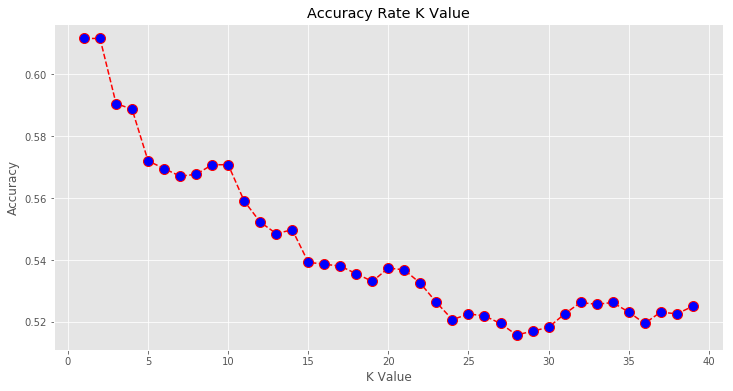

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')  

ОЧЕНЬ ПЛОХО

In [62]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    error.append(np.mean(pred_i != y_test))
print(np.round(error, 2))

[ 0.39  0.39  0.41  0.41  0.43  0.43  0.43  0.43  0.43  0.43  0.44  0.45
  0.45  0.45  0.46  0.46  0.46  0.46  0.47  0.46  0.46  0.47  0.47  0.48
  0.48  0.48  0.48  0.48  0.48  0.48  0.48  0.47  0.47  0.47  0.48  0.48
  0.48  0.48  0.47]


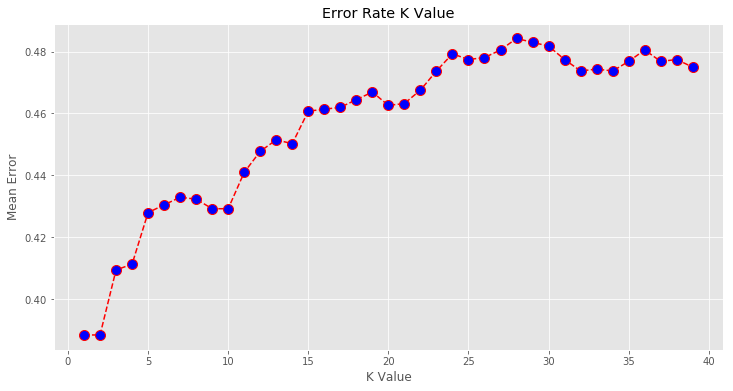

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [72]:
df = data

In [73]:
#  разделяю на обучающую и тестовую выборку
df_train, df_test = train_test_split(df, test_size=0.33) 

In [74]:
df_train.quality.value_counts()

6    1461
5     981
7     611
4     107
8     106
3      11
9       4
Name: quality, dtype: int64

In [75]:
df_test.quality.value_counts()

6    737
5    476
7    269
8     69
4     56
3      9
9      1
Name: quality, dtype: int64

In [76]:
#Предпологаем что k меньше 50
for i in range(3, 10):
    if(len(df_train[df_train.quality==i]) < 50):
        index_i = [random.randint(0, len(df_train[df_train.quality==i])-1) for j in range(50)]
        df_train = df_train.append(df_train[df_train.quality==i].iloc[index_i], ignore_index=True)

In [77]:
df_train.quality.value_counts()

6    1461
5     981
7     611
4     107
8     106
3      61
9      54
Name: quality, dtype: int64

In [78]:
#  разделяю предикоторы и отклики
X_train = df_train.iloc[:, :-1].values  
y_train = df_train.quality
X_test = df_test.iloc[:, :-1].values  
y_test = df_test.quality

In [79]:
#  Стандартизация предикторов

scaler = StandardScaler()  
scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)

In [80]:
#  Построение классификатора
#  По умолчанию Евклидово расстояние
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  
classifier.fit(X_train_2, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [81]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2) 

In [82]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test))  

[[  61    0    0    0    0    0    0]
 [   0  107    0    0    0    0    0]
 [   0    0  981    0    0    0    0]
 [   0    0    0 1461    0    0    0]
 [   0    0    0    0  611    0    0]
 [   0    0    0    0    0  106    0]
 [   0    0    0    0    0    0   54]]
             precision    recall  f1-score   support

          3       1.00      1.00      1.00        61
          4       1.00      1.00      1.00       107
          5       1.00      1.00      1.00       981
          6       1.00      1.00      1.00      1461
          7       1.00      1.00      1.00       611
          8       1.00      1.00      1.00       106
          9       1.00      1.00      1.00        54

avg / total       1.00      1.00      1.00      3381

[[  0   2   4   3   0   0   0]
 [  1   7  26  12   8   1   1]
 [  2   5 326 123  16   4   0]
 [  0   2 115 523  83  10   4]
 [  0   0  10  84 170   5   0]
 [  0   0   0  13  24  31   1]
 [  0   0   0   0   1   0   0]]
             precision    recall  f

In [83]:
accuracy = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    accuracy.append(accuracy_score(y_test, pred_i))
print(np.round(accuracy, 2))

[ 0.63  0.63  0.65  0.65  0.65  0.66  0.66  0.65  0.65  0.65  0.66  0.65
  0.66  0.65  0.66  0.66  0.66  0.66  0.66  0.66  0.67  0.67  0.67  0.66
  0.66  0.67  0.67  0.66  0.66  0.66  0.66  0.67  0.66  0.66  0.66  0.67
  0.67  0.67  0.66]


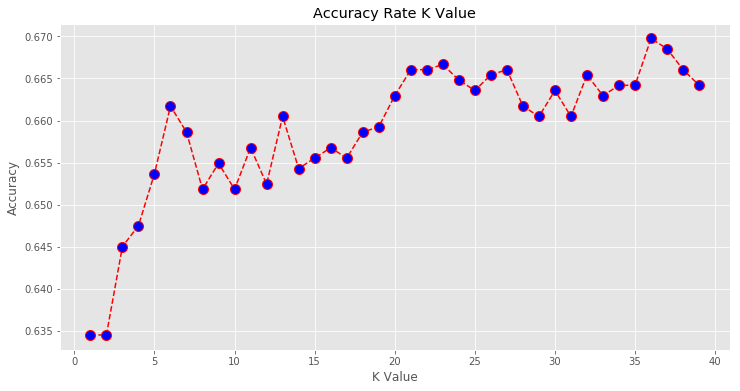

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')  

УЖЕ ЛУЧШЕ

In [85]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    error.append(np.mean(pred_i != y_test))
print(np.round(error, 2))

[ 0.37  0.37  0.35  0.35  0.35  0.34  0.34  0.35  0.35  0.35  0.34  0.35
  0.34  0.35  0.34  0.34  0.34  0.34  0.34  0.34  0.33  0.33  0.33  0.34
  0.34  0.33  0.33  0.34  0.34  0.34  0.34  0.33  0.34  0.34  0.34  0.33
  0.33  0.33  0.34]


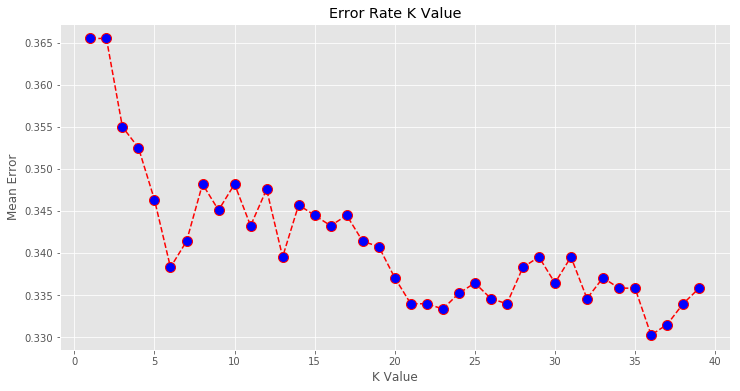

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 